In [33]:
from IPython.core.display import display, HTML, Markdown
import copy
import numpy as np
import matplotlib.pyplot as plt
from networkx import nx

n = 20
# segue una lista di precedenze della forma [u,v], cl significato che u deve essere schedulato oprima di v.



nodes=[(0+i) for i in range(n)]
yaml_edges=[   # commenta le righe relative agli archi dell'icosaedro che vuoi deletare. Usa flip per invertire la direzione degii archi
        {"flip":0,"tail":0,"head":1,'w': -7},
        {"flip":0,"tail":1,"head":2,'w': 1},
        {"flip":0,"tail":2,"head":3,'w': 2},
        {"flip":0,"tail":0,"head":4,'w': -5},
        {"flip":0,"tail":4,"head":3,'w': 9},
        {"flip":0,"tail":5,"head":0,'w': 3},
        {"flip":0,"tail":1,"head":7,'w': 7},
        {"flip":0,"tail":2,"head":9,'w': 5},
        #{"flip":0,"tail":11,"head":3,'w': -1},
        {"flip":0,"tail":13,"head":4,'w': 11},
        {"flip":0,"tail":14,"head":13,'w': 8},
        #{"flip":0,"tail":13,"head":12,'w': 6},
        {"flip":0,"tail":11,"head":12,'w': -2},
        {"flip":0,"tail":10,"head":11,'w': -7},
        {"flip":0,"tail":9,"head":10,'w': -17},
        {"flip":1,"tail":8,"head":9,'w': 12},
        #{"flip":0,"tail":8,"head":7,'w': 19},
        {"flip":0,"tail":6,"head":7,'w': 3},
        {"flip":0,"tail":14,"head":5,'w': -9},
        {"flip":0,"tail":5,"head":6,'w': -1},
        #{"flip":0,"tail":6,"head":15,'w': -1},
        {"flip":0,"tail":16,"head":8,'w': -1},
        {"flip":0,"tail":2,"head":3,'w': 7},
        {"flip":0,"tail":10,"head":17,'w': -5},
        #{"flip":0,"tail":12,"head":18,'w': 11},
        #{"flip":0,"tail":19,"head":14,'w': 18},
        {"flip":0,"tail":17,"head":16,'w': -9},
        {"flip":0,"tail":16,"head":15,'w': 10},
        {"flip":0,"tail":19,"head":15,'w': 1},
        #{"flip":0,"tail":18,"head":19,'w': 19},
        {"flip":0,"tail":18,"head":17,'w': -23}
        
        ]

prec_original_instance = []
for e in yaml_edges:
    if e["flip"] == 1:
        prec_original_instance.append((e["head"],e["tail"]))
    else:
        prec_original_instance.append((e["tail"],e["head"]))
        
yaml_edges2=[   # commenta le righe relative agli archi dell'icosaedro che vuoi deletare. Usa flip per invertire la direzione degli archi
        {"flip":0,"tail":0,"head":1,'w': -7},
        {"flip":0,"tail":1,"head":2,'w': 1},
        {"flip":0,"tail":2,"head":3,'w': 2},
        {"flip":0,"tail":0,"head":4,'w': -5},
        {"flip":0,"tail":4,"head":3,'w': 9},
        {"flip":0,"tail":5,"head":0,'w': 3},
        {"flip":0,"tail":1,"head":7,'w': 7},
        {"flip":0,"tail":2,"head":9,'w': 5},
        #{"flip":0,"tail":11,"head":3,'w': -1},
        {"flip":0,"tail":13,"head":4,'w': 11},
        {"flip":0,"tail":14,"head":13,'w': 8},
        #{"flip":0,"tail":13,"head":12,'w': 6},
        {"flip":0,"tail":11,"head":12,'w': -2},
        {"flip":0,"tail":10,"head":11,'w': -7},
        {"flip":0,"tail":9,"head":10,'w': -17},
        {"flip":0,"tail":8,"head":9,'w': 12},
        #{"flip":0,"tail":8,"head":7,'w': 19},
        {"flip":0,"tail":6,"head":7,'w': 3},
        {"flip":0,"tail":14,"head":5,'w': -9},
        {"flip":0,"tail":5,"head":6,'w': -1},
        #{"flip":0,"tail":6,"head":15,'w': -1},
        {"flip":0,"tail":16,"head":8,'w': -1},
        {"flip":0,"tail":2,"head":3,'w': 7},
        {"flip":0,"tail":10,"head":17,'w': -5},
        #{"flip":0,"tail":12,"head":18,'w': 11},
        #{"flip":0,"tail":19,"head":14,'w': 18},
        {"flip":0,"tail":17,"head":16,'w': -9},
        {"flip":0,"tail":16,"head":15,'w': 10},
        {"flip":0,"tail":19,"head":15,'w': 1},
        #{"flip":0,"tail":18,"head":19,'w': 19},
        {"flip":0,"tail":18,"head":17,'w': -23}
        
        ]

prec_original_instance2 = []
for e in yaml_edges2:
    if e["flip"] == 1:
        prec_original_instance2.append((e["head"],e["tail"]))
    else:
        prec_original_instance2.append((e["tail"],e["head"]))
        

In [94]:
def evaluation_format(answ, pt_green,pt_red, index_pt):
    pt_blue=0
    if pt_green!=0:
        pt_blue=pt_red-pt_green
        pt_red=0
    '''
    arr_point[index_pt]=pt_green
    file = open("points.txt", "w")
    file.write(str(arr_point))
    file.close()
    '''
    return f"{answ}. Totalizzeresti <span style='color:green'>[{pt_green} safe pt]</span>, \
                                    <span style='color:blue'>[{pt_blue} possible pt]</span>, \
                                    <span style='color:red'>[{pt_red} out of reach pt]</span>.<br>"







def visualizza_e_valuta_le_precedenze_non_rispettate(soluzione_problem_solver,lista_di_precedenze, pt_green, pt_red, index_pt, silent=False):
    lista_visualizza=[] # lista di tuple (archi)
    #controllo sulla lunghezza della lista fornita
    if(len(soluzione_problem_solver)!=n):
        #modifcare l'output, dire di che lunghezza voglio la lista e di che lunghezza l'ha data lui
        if(silent):
            return 0
        else:
            str_to_print=evaluation_format("No", 0, pt_red, index_pt) + "Hai fornito una soluzione di lungezza "+str(len(soluzione_problem_solver)) + ": \
dovresti fornirla di lunghezza "+str(n)
            return display(Markdown(str_to_print))
    
    check=np.zeros(len(soluzione_problem_solver))
    #incremento la posizione soluzione_problem_solver[i] di uno , se sono inseriti tutti correttamente avrò
    #un array di soli 1
    for i in range(len(soluzione_problem_solver)):
        try:
            check[soluzione_problem_solver[i]]=check[soluzione_problem_solver[i]]+1
        except:
            if(silent):
                return 0
            else:
                str_to_print=evaluation_format("No", 0, pt_red, index_pt) + "Hai inserito il nodo "+str(soluzione_problem_solver[i])+", ti ricordo che i nodi \
vanno da 0 a " + str(n-1)
                return display(Markdown(str_to_print))   
    
    contatore_errori=0
    
    #la lista contiene una e una volta sola tutti gli elementi
    if(np.all((check == 1))):
        if(lista_di_precedenze==1):
            for element in prec_original_instance:
                indice1=soluzione_problem_solver.index(element[0])
                indice2=soluzione_problem_solver.index(element[1])
                if(indice1>indice2):
                    lista_visualizza.append((element[0], element[1]))
                    contatore_errori=contatore_errori+1
        if(lista_di_precedenze==2):
                for element in prec_original_instance2:
                    indice1=soluzione_problem_solver.index(element[0])
                    indice2=soluzione_problem_solver.index(element[1])
                    if(indice1>indice2):
                        lista_visualizza.append((element[0], element[1]))
                        contatore_errori=contatore_errori+1
        if(lista_di_precedenze!=2 and lista_di_precedenze!=1):
            return "Vorresti valutare la tua soluzione rispetto alla lista di precedenze numero \
" +str(lista_di_precedenze)+ " Ti ricordo che le liste di precedenze sono 2, \
se vuoi valutare la tua soluzione rispetto alla prima lista digita 1 , altrimenti 2"
        
        if(contatore_errori==0):
            if(silent):
                return 1
            else:
                str_to_print=evaluation_format("Si", pt_green, pt_red, index_pt) + "Sei riuscito a rispettare tutte le precedenze : hai dimostrato che il grafo fornito è un DAG!"
                return display(Markdown(str_to_print))
        else:
            if(silent):
                return 0
            else:
                str_to_print=evaluation_format("No", 0, pt_red, index_pt) + "Non hai rispettato " + str(contatore_errori) + " precedenze "
                display(Markdown(str_to_print))
                return visualizza(lista_visualizza)
        
    #manca un elemento e/o un elemento viene ripetuto più di una volta
    else:
        if(silent):
            return 0
        else:
            for k in range(len(check)):
                if(check[k]==0):
                    if(silent):
                        return 0
                    else:
                        str_to_print=evaluation_format("No", 0, pt_red, index_pt) +"L'array NON contiene tutti i nodi, il nodo numero " + str(k) + " non è presente "
                        return display(Markdown(str_to_print))
                        
                        
def visualizza(ordinamento):
    G = nx.DiGraph()
    # mathplotlib o networkx o ?
    # visualizziamo il grafo coi nodi sulla linea nelle posizioni specificate da ordinamento e gli archi che fanno panza per poterli vedere
    # il problem-solver deve rendersi conto di quali archi sono rivolti all'indietro.
    #for i in range(len(ordinamento)-1):
    #    G.add_edge(ordinamento[i],ordinamento[i+1])
    G.add_edges_from(ordinamento)
    nx.draw_planar(G,with_labels=True,arrows=True)
    plt.plot()
    
    
    
def ciclo_di_precedenze(soluzione_problem_solver,lista_di_precedenze, pt_green, pt_red, index_pt, silent=False):
    lunghezza=len(soluzione_problem_solver)
    precedenze_da_valutare=0
    if(lista_di_precedenze==1):
        precedenze_da_valutare=prec_original_instance
    if(lista_di_precedenze==2):
        precedenze_da_valutare=prec_original_instance2
    if(lista_di_precedenze!=1 and lista_di_precedenze!=2):
        if(silent):
            return 0
        else:
            return "Vorresti valutare la tua soluzione rispetto alla lista di precedenze numero \
" +str(lista_di_precedenze)+ " ti ricordo che le liste di precedenze sono 2, \
se vuoi valutare la tua soluzione rispetto alla prima lista digita 1 , altrimenti 2"
    #la lista contiene una e una volta sola tutti gli elementi
    
    # creo una stringa che raccoglie i nodi non esistenti (se forniti dallo studente in soluzione_problem_solver)
    mystr=''
    for node in soluzione_problem_solver:
        if node not in nodes:
            if mystr=='':
                mystr=f'{node}'
            else:
                mystr=mystr+f', {node}'
    
    
    
    if (lunghezza>n) or (mystr!='') or (lunghezza==0):
        if lunghezza>n:
            str_to_print=f"Attenzione: hai fornito un ciclo più lungo del numero totale di nodi del grafo, ovvero {n}."
        elif lunghezza==0:
            str_to_print=f"Attenzione: hai fornito un ciclo privo di nodi"
        else:
            str_to_print=f"Attenzione: i nodi {mystr} non esistono !"
        str_to_print=evaluation_format("No", 0, pt_red, index_pt) + str_to_print
        return display(Markdown(str_to_print))
    else:   
        if ((soluzione_problem_solver[(len(soluzione_problem_solver)-1)],soluzione_problem_solver[0]) in precedenze_da_valutare):
            for i in range(len(soluzione_problem_solver)-1):
                if((soluzione_problem_solver[i],soluzione_problem_solver[i+1]) not in precedenze_da_valutare):
                    if(silent):
                        return 0
                    else:
                        str_to_print=evaluation_format("No", 0, pt_red, index_pt) + "Sembra che la tua lista non contenga un ciclo : controlla le precedenze tra il nodo " + str(soluzione_problem_solver[i]) + " e il nodo " + str(soluzione_problem_solver[i+1])
                        return display(Markdown(str_to_print))
            if(silent):
                return 1
            else:
                str_to_print=evaluation_format("Si", pt_green, pt_red, index_pt) + "La sequenza di nodi " + str(soluzione_problem_solver)+f" che hai fornito descrive un ciclo presente in GRAFO_CON_CICLO={lista_di_precedenze}"
                return display(Markdown(str_to_print))
        else:
            if(silent):
                return 0
            else:
                str_to_print=evaluation_format("No", 0, pt_red, index_pt) + "Sembra che la tua lista non contenga un ciclo : controlla le precedenze tra il nodo " + str(soluzione_problem_solver[lunghezza-1]) + " e il nodo " + str(soluzione_problem_solver[lunghezza-lunghezza])
                return display(Markdown(str_to_print)) 

def visualizza_icosaedro(grafo):
    front_face = [15, 16, 17, 18, 19]
    back_face = [0, 1, 2, 3, 4]
    middle = list(set(range(20)).difference(front_face + back_face))
    shells = [front_face] + [middle] + [back_face]
    pos = nx.shell_layout(grafo, shells)
    #nx.draw_networkx(icosaedro, pos)
    nx.draw_networkx_nodes(grafo, pos, alpha=0.6) #node_color='cyan',
    nx.draw_networkx_labels(grafo, pos)
    #disegna archi e etichette sugli archi
    #positive=[(u,v) for (u,v,d) in grafo.edges(data=True) if d['w'] >= 0]
    #negative=[(u,v) for (u,v,d) in grafo.edges(data=True) if d['w'] < 0]
    positive=[(u,v)for (u,v,d) in grafo.edges(data=True)]
    
    nx.draw_networkx_edges(grafo,pos,edgelist=positive,width=2,alpha = 0.6,edge_color = "g",arrows=True)
    #nx.draw_networkx_edges(grafo,pos,edgelist=negative,width=2,alpha = 0.6,edge_color = "r",arrows=True)
    
    #labels = nx.get_edge_attributes(grafo,'w')
    #nx.draw_networkx_edge_labels(grafo,pos,edge_labels=labels)
    ax = plt.gca()
    ax.set_aspect('equal')
    ax.set_axis_off()

def subplt(grafo_1, grafo_2):
    fig = plt.figure()
    plt.rcParams["figure.figsize"] = (15,7)
    front_face = [15, 16, 17, 18, 19]
    back_face = [0, 1, 2, 3, 4]
    middle = list(set(range(20)).difference(front_face + back_face))
    shells = [front_face] + [middle] + [back_face]
    
    plt.subplot(121).title.set_text('GRAFO 1')
    pos = nx.shell_layout(grafo_1, shells)
    nx.draw_networkx_nodes(grafo_1, pos, alpha=0.6) 
    nx.draw_networkx_labels(grafo_1, pos)
    positive=[(u,v) for (u,v,d) in grafo_1.edges(data=True)]
    nx.draw_networkx_edges(grafo_1,pos,edgelist=positive,width=2,alpha = 0.6,edge_color = "g",arrows=True)
    
    plt.subplot(122).title.set_text('GRAFO 2')
    pos = nx.shell_layout(grafo_2, shells)
    nx.draw_networkx_nodes(grafo_2, pos, alpha=0.6) 
    nx.draw_networkx_labels(grafo_2, pos)
    positive=[(u,v) for (u,v,d) in grafo_2.edges(data=True)]
    nx.draw_networkx_edges(grafo_2,pos,edgelist=positive,width=2,alpha = 0.6,edge_color = "g",arrows=True)
    
    
    
    plt.show()

In [95]:
nodes=[(0+i) for i in range(20)]
edges=prec_original_instance
icosaedro_1=nx.DiGraph()
icosaedro_1.add_nodes_from(nodes)
icosaedro_1.add_edges_from(edges)

edges=prec_original_instance2
icosaedro_2=nx.DiGraph()
icosaedro_2.add_nodes_from(nodes)
icosaedro_2.add_edges_from(edges)

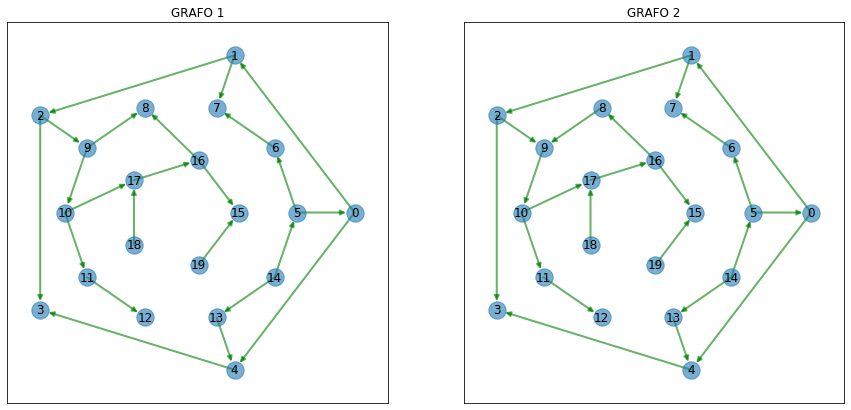

In [96]:
#visualizza_icosaedro(icosaedro_1)
subplt(icosaedro_1,icosaedro_2)

In [97]:
#Un grafo diretto è un DAG (un acronimo per Directed Acyclic Graph) se non contiene alcun ciclo diretto. 
#Un ciclo diretto in un grafo diretto G=(V,A) è una sequenza ciclica di nodi tale che
#la coppia ordinata (u,v) sia arco di G ogniqualvota u e v appaiano consecutivi ed in questo ordine 
#entro la sequenza, oppure u sia l'ultimo nodo e v il primo. Questo esercizio ti chiede di riconoscere se 
#un grafo G diretto a te assegnato è un DAG oppure no, esprimendo il certificato del caso (o una sequenza 
#ciclica di nodi che indichi il ciclo o un ordinamento dei nodi tale che ogni arco di G sia rivolto in avanti 
#entro l'ordinamento). 
#In realtà ti forniremo due diverse istanze di questo problema e ti chiederemo di stabilire quale delle due offra 
#un DAG e quale no.

In [102]:
# Specifica quale dei due grafi contiene un ciclo settando la seguente variabile:

GRAFO_CON_CICLO = 2   # 1 oppure 2 ?

# Riesci anche a fornire una sequenza v1,v2,...vt di nodi che formino un ciclo entro il grafo GRAFO_CON_CICLO?
# In pratica dovrà valere che:
# (vt,v1) sia una precedenza presente entro GRAFO_CON_CICLO
# (vi,v(i+1)) sia una precedenza presente entro GRAFO_CON_CICLO per ogni i = 1,2, ..., t-1.
ciclo  = [16,8,9,10,17]            
ciclo_di_precedenze(ciclo, GRAFO_CON_CICLO, pt_green=10, pt_red=10, index_pt=5)

Si. Totalizzeresti <span style='color:green'>[10 safe pt]</span>,                                     <span style='color:blue'>[0 possible pt]</span>,                                     <span style='color:red'>[0 out of reach pt]</span>.<br>La sequenza di nodi [16, 8, 9, 10, 17] che hai fornito descrive un ciclo presente in GRAFO_CON_CICLO=2

No. Totalizzeresti <span style='color:green'>[0 safe pt]</span>,                                     <span style='color:blue'>[0 possible pt]</span>,                                     <span style='color:red'>[10 out of reach pt]</span>.<br>Non hai rispettato 9 precedenze 

Si. Totalizzeresti <span style='color:green'>[10 safe pt]</span>,                                     <span style='color:blue'>[0 possible pt]</span>,                                     <span style='color:red'>[0 out of reach pt]</span>.<br>Sei riuscito a rispettare tutte le precedenze : hai dimostrato che il grafo fornito è un DAG!

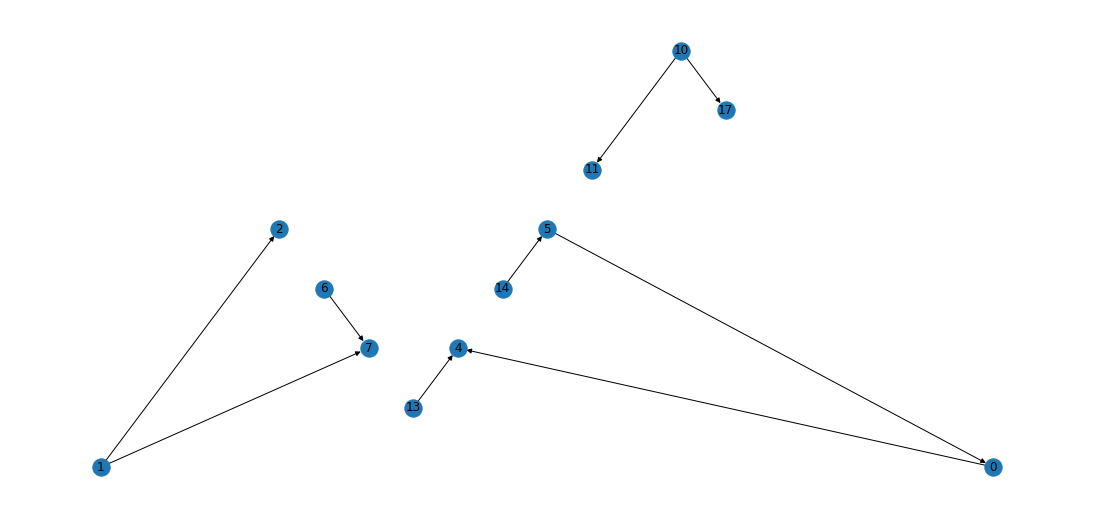

In [111]:
# Specifica quale dei due grafi è invece un DAG settando la seguente variabile:

GRAFO_DAG = 1   # 1 oppure 2 ?

# Un grafo è un DAG se è possibile fornire un ordinamento totale v1,v2, ..., vn dei sui nodi tale che:
# per ogni arco (u,v) del grafo il nodo u precede il nodo v nell'ordinamento dato.

lista_da_sinistra_a_destra = [4, 7, 2, 0, 11, 5, 19, 18, 6, 17, 14, 16, 3, 1, 9, 13, 8, 12 ,15, 10]

visualizza_e_valuta_le_precedenze_non_rispettate(lista_da_sinistra_a_destra,GRAFO_DAG, pt_green=10, pt_red=10, index_pt=5)
#visualizza(prec_original_instance)

# Per l'altro grafo, Ordina comunque le attività in modo da minimizzare il numero di precedenze non rispettate.
# Le attività sono rappresentate dai numeri compresi da 0 a n-1
#Nota: Ti vengono fornite 2 liste di precedenze, ricorda che la fuzione ha bisogno,oltre che alla lista fornita da te, il numero della lista di precedenze
#       rispetto alla quale vuoi verificare che la tua lista non contenga un ciclo. inserisci 1 per la prima o 2 per la seconda.

lista_da_sinistra_a_destra = [19,14,13,5,0,1,2,9,10,11,12,18,17,16,15,8,4,3,6,7]


visualizza_e_valuta_le_precedenze_non_rispettate(lista_da_sinistra_a_destra,GRAFO_DAG, pt_green=10, pt_red=10, index_pt=5)

In [119]:
# link utili alla risoluzione dell'esercizio
# https://en.wikipedia.org/wiki/Directed_acyclic_graph